In [19]:
# Reference: https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
seed = 21
np.random.seed(seed)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


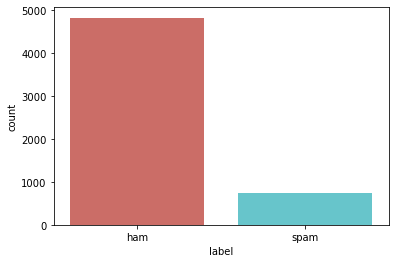

In [3]:
# Read SMS data base with pandas.
#url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
#sms = pd.read_table(url, header=None, names=['label', 'message'])

file='../../../../data/sms.tsv'
sms = pd.read_table(file, header=None, names=['label', 'message'])

# examine the first 10 rows
print(sms.head())

# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Create feature and label vectors.
X = sms.message
y = sms.label_num

sns.countplot(x='label', data=sms, palette='hls')
plt.show()

In [4]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [5]:
# Convert a collection of text documents into a matrix of token counts.
vect = CountVectorizer(binary=True)
# Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by transform, but more efficiently implemented.
X_train_dtm = vect.fit_transform(X_train)

In [20]:
print(X_train_dtm.toarray()[0:10,0:10])
print(X_train_dtm.shape)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
(4179, 3491)


In [7]:
# Instantiate a Bernoulli Naive Bayes model.
# If binarize=None, input is presumed to already consist of binary vectors.
nb = BernoulliNB(binarize=None)

In [8]:
# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

BernoulliNB(binarize=None)

In [9]:
# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)
# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

In [10]:
# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

0.9798994974874372

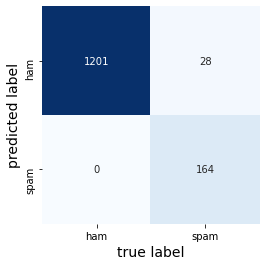

In [11]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
# Save figure
plt.savefig("confusion_matrix_spam_classification.png", dpi=600)
plt.show()

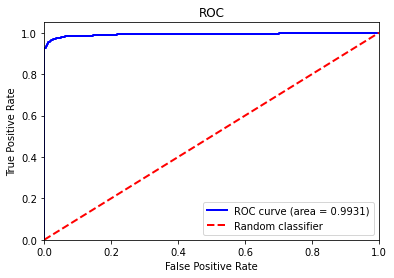

In [12]:
# Getting the probabilities for each class.
y_prob = nb.predict_proba(X_test_dtm)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Print messages for the false positives (ham incorrectly classified as spam).
X_test[y_pred_class > y_test]

Series([], Name: message, dtype: object)

In [14]:
# Print messages for the false negatives (spam incorrectly classified as ham).
X_test[y_pred_class < y_test]

3942    Free Msg: get Gnarls Barkleys "Crazy" ringtone...
2079                       85233 FREE>Ringtone!Reply REAL
4968    You can donate £2.50 to UNICEF's Asian Tsunami...
3360    Sorry I missed your call let's talk when you h...
607     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
3862    Free Msg: Ringtone!From: http://tms. widelive....
3981                                   ringtoneking 84484
2863    Adult 18 Content Your video will be with you s...
5466    http//tms. widelive.com/index. wml?id=820554ad...
2965    Do you ever notice that when you're driving, a...
713                 08714712388 between 10am-7pm Cost 10p
4373    Ur balance is now £600. Next question: Complet...
3391    Please CALL 08712402972 immediately as there i...
3425    Am new 2 club & dont fink we met yet Will B gr...
2945    We currently have a message awaiting your coll...
2699                             FROM 88066 LOST £12 HELP
5120         PRIVATE! Your 2003 Account Statement for 078
2295     You h

In [15]:
# Calculate predicted probabilities for X_test_dtm (poorly calibrated).
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
# Calculate AUC.
metrics.roc_auc_score(y_test, y_pred_prob)

0.9931307243963364

### Removendo stop words.

Exemplos de stop words em inglês são 'a', 'the', 'is', 'are', etc.

Elas podem ser excluídas porque aumentam o trabalho exigido pelo algoritmo para analisá-los, enquanto fornecem benefício mínimo.

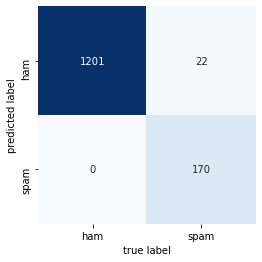

In [16]:
# Remove English stop words.
vect = CountVectorizer(binary=True, min_df=2, max_df=0.5)

# Learn the vocabulary dictionary and return term-document matrix.
X_train_dtm = vect.fit_transform(X_train)

# Instantiate a Multinomial Naive Bayes model.
nb = BernoulliNB(binarize=None)

# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)

# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

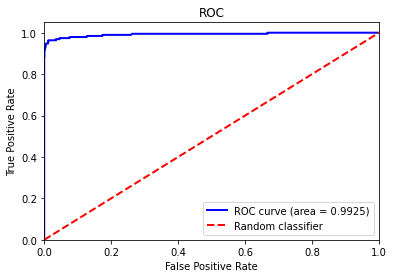

In [17]:
# Getting the probabilities for each class.
y_prob = nb.predict_proba(X_test_dtm)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc)
)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

0.9842067480258435